# Download Data

[Daily and Sports Activities](https://archive.ics.uci.edu/dataset/256/daily+and+sports+activities)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
%cd drive/My Drive/MIPT/Unsupervised/

/content/drive/My Drive/MIPT/Unsupervised


In [ ]:
# import os
# import numpy as np
# import pandas as pd
# from tqdm import tqdm

# # Configuration - update this to your actual data path
# DATA_DIR = './data'  # The root directory containing a01, a02, etc.
# ACTIVITIES = [f'a{i:02d}' for i in range(1, 20)]  # a01 to a19
# SUBJECTS = [f'p{i}' for i in range(1, 9)]  # p1 to p8
# SEGMENTS = [f's{i:02d}' for i in range(1, 61)]  # s01 to s60

# # Sensor column names (45 total)
# UNITS = ['T', 'RA', 'LA', 'RL', 'LL']  # Torso, Right Arm, Left Arm, Right Leg, Left Leg
# SENSORS = ['xacc', 'yacc', 'zacc', 'xgyro', 'ygyro', 'zgyro', 'xmag', 'ymag', 'zmag']
# COLUMNS = [f"{unit}_{sensor}" for unit in UNITS for sensor in SENSORS]

# # Activity label mapping
# ACTIVITY_LABELS = {
#     1: 'sitting', 2: 'standing', 3: 'lying on back', 4: 'lying on right side',
#     5: 'ascending stairs', 6: 'descending stairs', 7: 'standing in elevator',
#     8: 'moving in elevator', 9: 'walking in parking lot', 10: 'walking on treadmill (flat)',
#     11: 'walking on treadmill (inclined)', 12: 'running on treadmill',
#     13: 'exercising on stepper', 14: 'exercising on cross trainer',
#     15: 'cycling horizontal', 16: 'cycling vertical', 17: 'rowing',
#     18: 'jumping', 19: 'playing basketball'
# }

# def read_segment_file(file_path):
#     """Read a single segment file and return as numpy array"""
#     try:
#         return np.loadtxt(file_path, delimiter=',')
#     except Exception as e:
#         print(f"Error reading {file_path}: {str(e)}")
#         return None

# def build_full_dataframe():
#     """Constructs a DataFrame with all 125 timepoints per segment"""
#     records = []

#     for activity in tqdm(ACTIVITIES, desc='Processing Activities'):
#         activity_num = int(activity[1:])
#         activity_name = ACTIVITY_LABELS[activity_num]

#         for subject in tqdm(SUBJECTS, desc=f'Processing {activity}', leave=False):
#             subject_num = int(subject[1:])

#             for segment in SEGMENTS:
#                 segment_num = int(segment[1:])
#                 file_path = os.path.join(DATA_DIR, activity, subject, f"{segment}.txt")

#                 segment_data = read_segment_file(file_path)
#                 if segment_data is None:
#                     continue

#                 # Verify data shape (should be 125 timepoints × 45 sensors)
#                 if segment_data.shape != (125, 45):
#                     print(f"Unexpected shape {segment_data.shape} in {file_path}")
#                     continue

#                 # Create a record for each timepoint
#                 for timepoint in range(125):
#                     record = {
#                         'activity_num': activity_num,
#                         'activity_name': activity_name,
#                         'subject': subject_num,
#                         'segment': segment_num,
#                         'timepoint': timepoint,
#                         'timestamp_ms': timepoint * 40  # 25Hz = 40ms per sample
#                     }
#                     # Add all sensor readings
#                     record.update(zip(COLUMNS, segment_data[timepoint]))
#                     records.append(record)

#     return pd.DataFrame(records)

# # Build the complete DataFrame
# print("Building DataFrame...")
# df = build_full_dataframe()

# # Print summary
# print("\nDataFrame created successfully!")
# print(f"Total segments processed: {len(df) // 125}")
# print(f"DataFrame shape: {df.shape}")
# print("\nSample data:")
# print(df.iloc[1000:1005][['activity_name', 'subject', 'segment', 'timepoint'] + COLUMNS[:3]])

Building DataFrame...


Processing Activities: 100%|██████████| 19/19 [58:48<00:00, 185.70s/it]



DataFrame created successfully!
Total segments processed: 9120
DataFrame shape: (1140000, 51)

Sample data:
     activity_name  subject  segment  timepoint  T_xacc  T_yacc  T_zacc
1000       sitting        1        9          0  8.0483  1.1523  5.5309
1001       sitting        1        9          1  8.0257  1.1374  5.6127
1002       sitting        1        9          2  8.0108  1.1669  5.6799
1003       sitting        1        9          3  7.9959  1.1596  5.6649
1004       sitting        1        9          4  7.9220  1.2569  5.5829


In [ ]:
# # Save to efficient format
# df.to_parquet('full_sensor_data.parquet', index=False)

In [ ]:
# pd.set_option('display.max_columns', None)

In [ ]:
# display(df.head(3))

,activity_num,activity_name,subject,segment,timepoint,timestamp_ms,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,RA_yacc,RA_zacc,RA_xgyro,RA_ygyro,RA_zgyro,RA_xmag,RA_ymag,RA_zmag,LA_xacc,LA_yacc,LA_zacc,LA_xgyro,LA_ygyro,LA_zgyro,LA_xmag,LA_ymag,LA_zmag,RL_xacc,RL_yacc,RL_zacc,RL_xgyro,RL_ygyro,RL_zgyro,RL_xmag,RL_ymag,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,1,sitting,1,1,0,0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.15730,0.70097,5.6829,7.9812,0.003876,-0.005213,-0.001168,-0.57285,-0.55907,-0.21226,3.4193,-8.3416,3.8627,-0.005155,-0.008437,-0.015600,-0.64769,0.34136,0.073549,-3.5160,9.0513,-0.93283,0.004734,0.007949,-0.013605,0.72985,-0.25366,-0.036453,-2.8071,-9.0812,2.6220,-0.000232,-0.012092,-0.004457,0.74017,0.30053,-0.057730
1,1,sitting,1,1,1,40,8.1305,1.0202,5.3843,-0.009368,0.023485,0.001953,-0.78717,-0.068275,0.15890,0.71829,5.6005,7.9712,0.012862,-0.005241,-0.003029,-0.57306,-0.55684,-0.21335,3.4340,-8.3708,3.8537,-0.014302,-0.001877,-0.004997,-0.64838,0.34240,0.074865,-3.5386,9.0812,-0.93332,0.014458,0.002668,-0.011870,0.73172,-0.25236,-0.034005,-2.8146,-9.0737,2.6218,-0.014784,-0.016477,0.002789,0.73937,0.30183,-0.057514
2,1,sitting,1,1,2,80,8.1604,1.0201,5.3622,0.015046,0.014330,0.000204,-0.78664,-0.068277,0.15879,0.69849,5.6612,7.9568,0.021639,-0.010421,0.011992,-0.57357,-0.55788,-0.21336,3.4291,-8.3757,3.8757,0.000126,-0.008308,-0.012062,-0.64821,0.34099,0.073155,-3.5385,9.0662,-0.92580,-0.009606,0.010623,-0.008289,0.72914,-0.25249,-0.036489,-2.8221,-9.0886,2.6366,-0.012770,0.005717,-0.007918,0.73955,0.30052,-0.057219


# Different Dimensionality Reduction + Clustering Algorithms

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import silhouette_score, adjusted_rand_score
from tqdm import tqdm

In [20]:
df = pd.read_parquet('full_sensor_data.parquet')

In [ ]:
def apply_clustering(features, n_clusters=19):
    results = {}

    # K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    results['kmeans'] = kmeans.fit_predict(features)

    # DBSCAN (auto-tune eps)
    from sklearn.neighbors import NearestNeighbors
    neigh = NearestNeighbors(n_neighbors=5)
    nbrs = neigh.fit(features)
    distances, _ = nbrs.kneighbors(features)
    eps = np.percentile(distances[:, 1], 95)  # More robust heuristic
    dbscan = DBSCAN(eps=eps, min_samples=5)
    results['dbscan'] = dbscan.fit_predict(features)

    # Hierarchical
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    results['hierarchical'] = hierarchical.fit_predict(features)

    return results

In [ ]:
def extract_manual_features(df):
    """Calculate mean, std, and quartiles (25th, 75th) for each sensor in each segment"""
    sensor_columns = [col for col in df.columns if col.startswith(('T_', 'RA_', 'LA_', 'RL_', 'LL_'))]

    features = []
    meta = []

    # Group by segment
    grouped = df.groupby(['activity_num', 'subject', 'segment'])

    for (activity, subject, segment), group in tqdm(grouped, desc="Extracting features"):
        # Calculate statistics
        segment_data = group[sensor_columns]
        means = segment_data.mean(axis=0)
        stds = segment_data.std(axis=0)
        q25 = segment_data.quantile(0.25, axis=0)
        q75 = segment_data.quantile(0.75, axis=0)

        # Create feature vector (4 stats per sensor)
        feature_vector = np.zeros(180)  # 45 sensors * 4 stats
        for i in range(45):
            feature_vector[4*i] = means.iloc[i]     # mean
            feature_vector[4*i + 1] = stds.iloc[i]  # std
            feature_vector[4*i + 2] = q25.iloc[i]   # 25th percentile
            feature_vector[4*i + 3] = q75.iloc[i]   # 75th percentile

        features.append(feature_vector)
        meta.append({
            'activity': activity,
            'subject': subject,
            'segment': segment
        })

    features = np.array(features)
    meta_df = pd.DataFrame(meta)
    return features, meta_df

def apply_clustering(features, n_clusters=19):
    results = {}

    # K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    results['kmeans'] = kmeans.fit_predict(features)

    # DBSCAN (auto-tune eps)
    from sklearn.neighbors import NearestNeighbors
    neigh = NearestNeighbors(n_neighbors=5)
    nbrs = neigh.fit(features)
    distances, _ = nbrs.kneighbors(features)
    eps = np.percentile(distances[:, 1], 95)  # More robust heuristic
    dbscan = DBSCAN(eps=eps, min_samples=5)
    results['dbscan'] = dbscan.fit_predict(features)

    # Hierarchical
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    results['hierarchical'] = hierarchical.fit_predict(features)

    return results

# Dimensionality Reduction and Evaluation
def reduce_and_cluster(features, meta_df, n_clusters=19):
    results = []

    # Scale features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Define reduction methods
    reducers = {
        'PCA': PCA(n_components=2),
        't-SNE': TSNE(n_components=2, perplexity=30),
        'UMAP': umap.UMAP(n_components=2, n_neighbors=10)
    }

    # For each reduction method
    for name, reducer in reducers.items():
        print(f"\nProcessing {name}...")

        # Reduce dimensions
        reduced_data = reducer.fit_transform(scaled_features)

        # Apply clustering
        clustering_results = apply_clustering(reduced_data, n_clusters)

        # Evaluate
        print(f"Clustering Evaluation for {name}:")
        print("{:<15} {:<15} {:<15}".format('Method', 'Silhouette', 'ARI'))

        true_labels = meta_df['activity'] - 1  # Make 0-based

        for cluster_name, labels in clustering_results.items():
            if len(np.unique(labels)) > 1:
                sil = silhouette_score(reduced_data, labels)
                ari = adjusted_rand_score(true_labels, labels)
                print("{:<15} {:<15.3f} {:<15.3f}".format(cluster_name, sil, ari))
            else:
                print(f"{cluster_name}: Only 1 cluster found")

        # Store results for visualization
        results.append({
            'name': name,
            'data': reduced_data,
            'clusterings': clustering_results
        })

    return results

# Visualization
def plot_reduction_results(results, meta_df):
    plt.figure(figsize=(18, 12))

    for i, result in enumerate(results, 1):
        for j, (cluster_name, cluster_labels) in enumerate(result['clusterings'].items(), 1):
            plt.subplot(3, 3, (i-1)*3 + j)

            # Plot by cluster
            scatter = plt.scatter(result['data'][:,0], result['data'][:,1],
                                c=cluster_labels, cmap='tab20', alpha=0.6)

            # Add activity centroids
            for act in meta_df['activity'].unique():
                mask = meta_df['activity'] == act
                plt.scatter(np.median(result['data'][mask,0]), np.median(result['data'][mask,1]),
                          marker='x', s=100, linewidths=2, color='black')

            plt.title(f"{result['name']} + {cluster_name}")
            plt.xlabel('Component 1')
            plt.ylabel('Component 2')

            if cluster_name == 'kmeans':
                plt.colorbar(scatter, label='Cluster')

    plt.tight_layout()
    plt.show()

In [ ]:
# 1. Extract features
print("Extracting manual features...")
features, meta_df = extract_manual_features(df)

Extracting manual features...


Extracting features: 100%|██████████| 9120/9120 [00:29<00:00, 305.02it/s]



Reducing dimensions and clustering...

Processing PCA...
Clustering Evaluation for PCA:
Method          Silhouette      ARI            
kmeans          0.483           0.458          
dbscan          -0.096          0.230          
hierarchical    0.454           0.449          

Processing t-SNE...
Clustering Evaluation for t-SNE:
Method          Silhouette      ARI            
kmeans          0.376           0.438          
dbscan          0.328           0.060          
hierarchical    0.344           0.406          

Processing UMAP...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clustering Evaluation for UMAP:
Method          Silhouette      ARI            
kmeans          0.418           0.231          
dbscan          0.622           0.114          
hierarchical    0.388           0.231          

Generating visualizations...


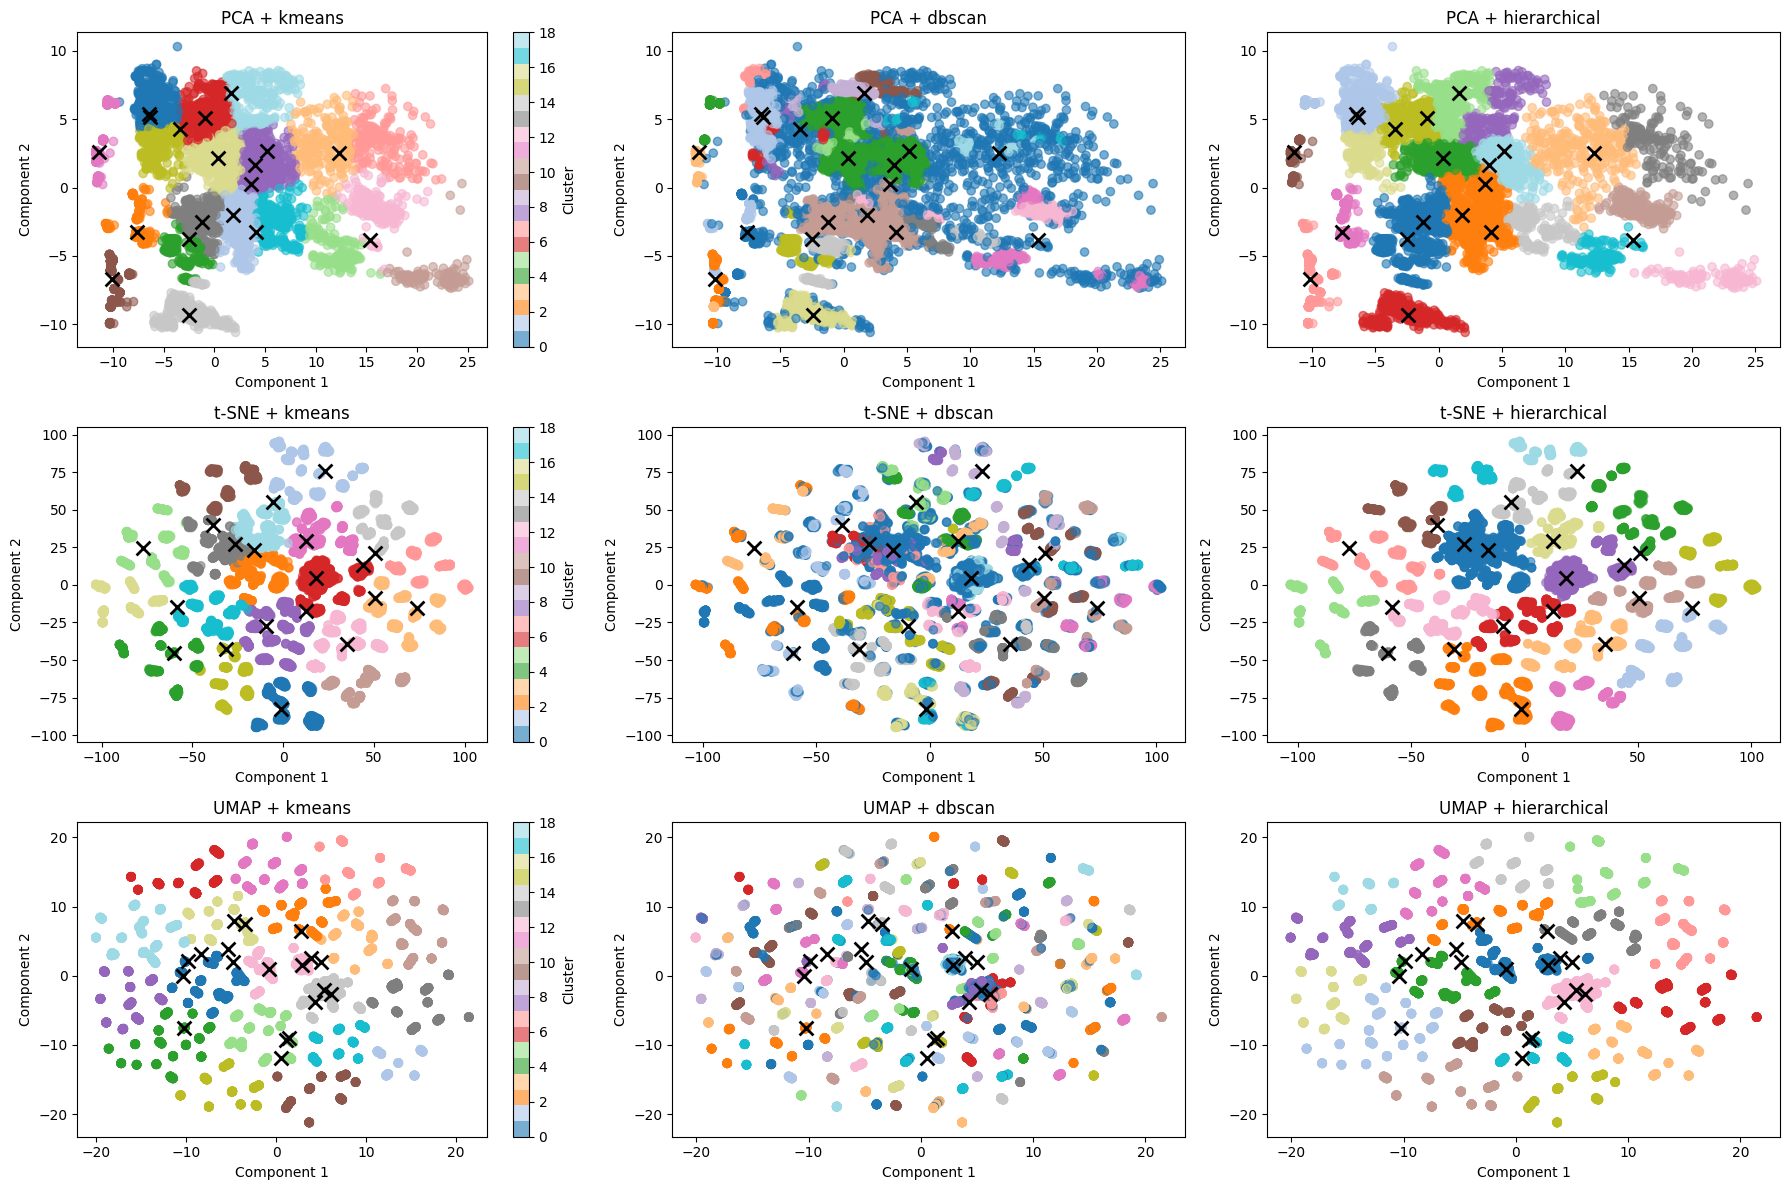

In [ ]:
# 2. Reduce dimensions and cluster
print("\nReducing dimensions and clustering...")
results = reduce_and_cluster(features, meta_df)

# 3. Visualize
print("\nGenerating visualizations...")
plot_reduction_results(results, meta_df)

# Fashion Mnist

In [2]:
!pip install datashader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 84.2 MB/s eta 0:00:00


In [3]:
import umap
import numpy as np
import pandas as pd
import requests
import os
import datashader as ds
import datashader.utils as utils
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="paper", style="white")

if not os.path.isfile("fashion-mnist.csv"):
    csv_data = requests.get("https://www.openml.org/data/get_csv/18238735/phpnBqZGZ")
    with open("fashion-mnist.csv", "w") as f:
        f.write(csv_data.text)

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


In [7]:
source_df = pd.read_csv("fashion-mnist.csv").sample(frac=0.1)

data = source_df.iloc[:, :784].values.astype(np.float32)
target = source_df["class"].values

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import trustworthiness
from umap import UMAP
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = data, target

# Print dataset shape
print("Data shape:", X.shape)
print("Labels shape:", y.shape)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Data shape: (7000, 784)
Labels shape: (7000,)


In [9]:
np.unique(target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Classification with Original Features

In [10]:
# Train logistic regression on original features
lr_original = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_original.fit(X_train_scaled, y_train)

# Evaluate performance
y_pred_original = lr_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy with original features: {accuracy_original:.4f}")

Accuracy with original features: 0.8007


## Dimensionality Reduction with PCA

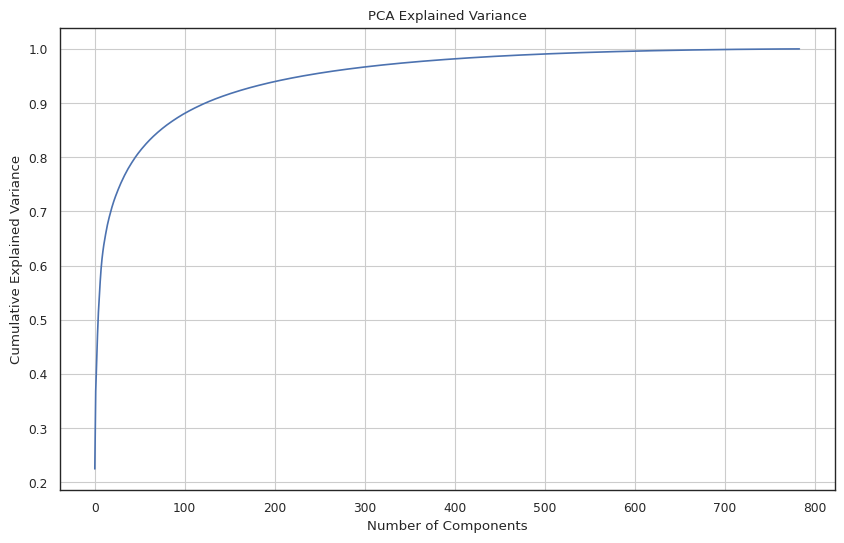

Number of components for 95% variance: 232


In [11]:
# Fit PCA on training data to see explained variance
pca = PCA().fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'b-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

# Print how many components needed for 95% variance
n_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components for 95% variance: {n_components_95}")

In [12]:
def pca_via_svd(X, n_components=None):
    """
    Perform PCA using SVD.

    Parameters:
    X : numpy array of shape (n_samples, n_features)
        Input data
    n_components : int or None
        Number of components to keep. If None, all components are kept.

    Returns:
    X_transformed : numpy array
        Transformed data
    """
    # Center the data (subtract mean from each feature)
    X_centered = X - np.mean(X, axis=0)

    # Perform SVD on the centered data
    U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)

    # Calculate the principal components
    principal_components = Vt.T

    # If n_components is specified, select the top n components
    if n_components is not None:
        principal_components = principal_components[:, :n_components]

    # Project the data onto the principal components
    X_transformed = np.dot(X_centered, principal_components)

    return X_transformed

## PCA Projection to 2D for Visualization

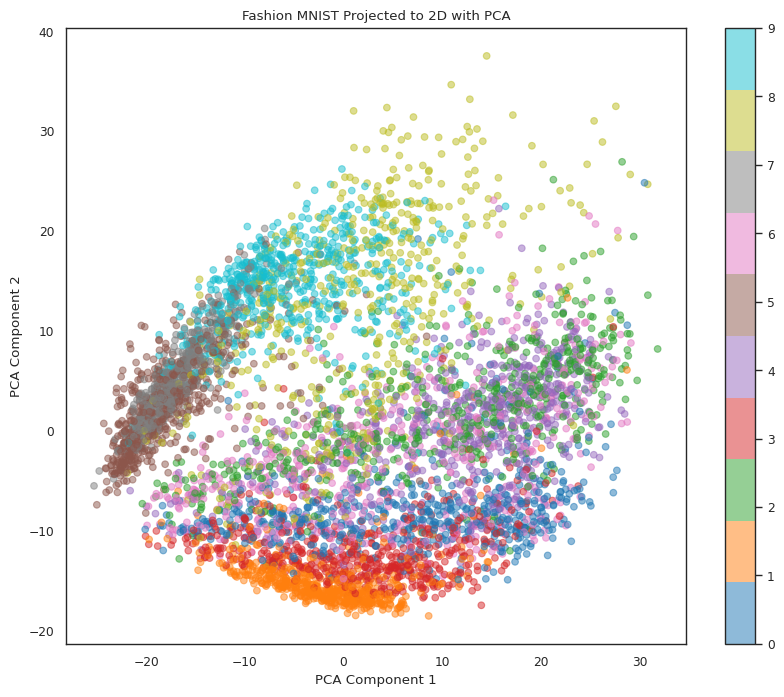

In [13]:
# Project data to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot 2D projection
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
                     c=y_train.astype(int), alpha=0.5, cmap='tab10')
plt.colorbar(scatter, ticks=range(10))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Fashion MNIST Projected to 2D with PCA')
plt.show()

In [14]:
X_train_pca_svd = pca_via_svd(X_train_scaled, n_components=2)
# Compare the results (absolute values since signs might flip)
print("\nMax absolute difference:", np.max(np.abs(np.abs(X_train_pca_svd) - np.abs(X_train_pca))))


Max absolute difference: 7.224083e-05


## Classification with PCA-reduced features

In [15]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Reduced dimensions: {X_train_pca.shape[1]}")

# Train logistic regression on PCA-reduced features
lr_pca = LogisticRegression(n_jobs=-1)
lr_pca.fit(X_train_pca, y_train)

# Evaluate performance
y_pred_pca = lr_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA features: {accuracy_pca:.4f}")

Reduced dimensions: 100
Accuracy with PCA features: 0.8214


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


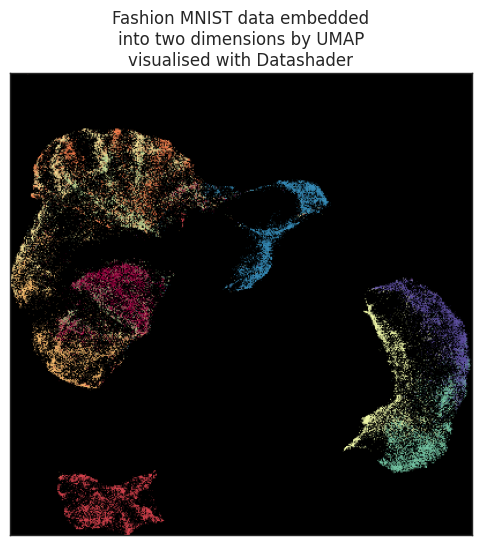

In [10]:
pal = [
    "#9e0142",
    "#d8434e",
    "#f67a49",
    "#fdbf6f",
    "#feeda1",
    "#f1f9a9",
    "#bfe5a0",
    "#74c7a5",
    "#378ebb",
    "#5e4fa2",
]
color_key = {str(d): c for d, c in enumerate(pal)}

reducer = umap.UMAP()
X_train_umap = reducer.fit_transform(X_train_scaled)

df = pd.DataFrame(embedding, columns=("x", "y"))
df["class"] = pd.Series([str(x) for x in y_train], dtype="category")

cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(df, "x", "y", ds.count_cat("class"))
img = tf.shade(agg, color_key=color_key, how="eq_hist")

utils.export_image(img, filename="fashion-mnist", background="black")

image = plt.imread("fashion-mnist.png")
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title(
    "Fashion MNIST data embedded\n"
    "into two dimensions by UMAP\n"
    "visualised with Datashader",
    fontsize=12,
)

plt.show()

In [16]:
umap = UMAP(n_components=50)
X_train_umap = umap.fit_transform(X_train)

# Calculate trustworthiness (measures how well local structure is preserved)
# trust = trustworthiness(X_train_scaled, X_train_umap, n_neighbors=10)
# print(f"UMAP trustworthiness: {trust:.4f}")

X_test_umap = umap.transform(X_test)

# Train logistic regression on UMAP-reduced features
lr_umap = LogisticRegression(n_jobs=-1)
lr_umap.fit(X_train_umap, y_train)

# Evaluate performance
y_pred_umap = lr_umap.predict(X_test_umap)
accuracy_umap = accuracy_score(y_test, y_pred_umap)
print(f"Accuracy with UMAP features: {accuracy_umap:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy with UMAP features: 0.7007
